# Data Exploration and Preparation

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Iris Dataset

In [36]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scatter plot of the Iris dataset

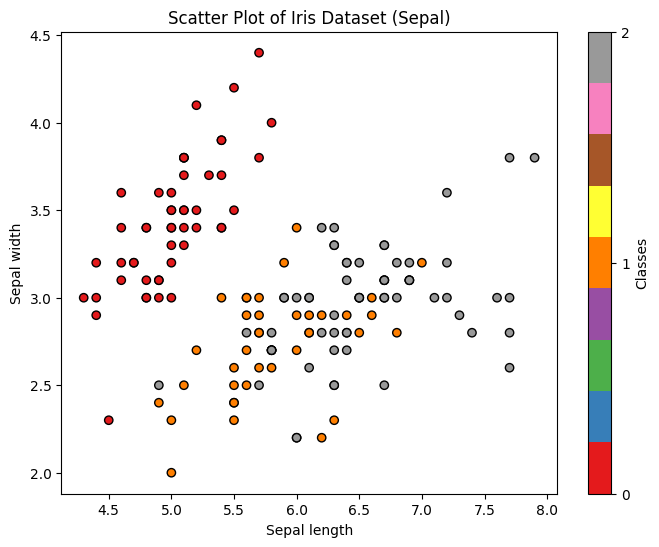

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter Plot of Iris Dataset (Sepal)')
plt.colorbar(ticks=[0, 1, 2], label='Classes')
plt.show()

# PCA representation of the Iris dataset

In [38]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

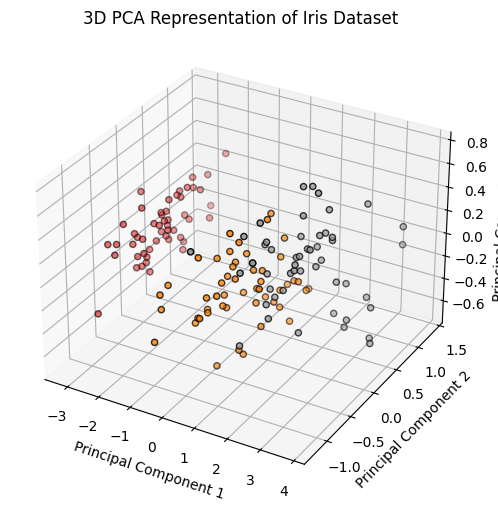

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Representation of Iris Dataset')
plt.show()

# Split the data into training and testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Implementation

In [42]:
from sklearn.svm import SVC

# Create SVM classifier with different kernels and parameters

In [43]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')

# K-fold Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score, KFold

# Define K-fold cross-validation

In [45]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluation Metrics

In [46]:
def evaluate_model(model, X_test, y_test):
    """Evaluate the performance of the model using various metrics."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [47]:
for svm_model in [svm_linear, svm_rbf, svm_poly]:
    cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=kfold)
    print("Model:", svm_model.kernel)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))
    svm_model.fit(X_train_scaled, y_train)
    accuracy, precision, recall, f1 = evaluate_model(svm_model, X_test_scaled, y_test)
    print("Test Accuracy:", accuracy)
    print("Test Precision:", precision)
    print("Test Recall:", recall)
    print("Test F1-score:", f1)
    print("-------------------------------------------------------")

Model: linear
Cross-Validation Scores: [0.91666667 1.         0.95833333 0.875      1.        ]
Mean CV Accuracy: 0.95
Test Accuracy: 0.9666666666666667
Test Precision: 0.9694444444444444
Test Recall: 0.9666666666666667
Test F1-score: 0.9664109121909632
-------------------------------------------------------
Model: rbf
Cross-Validation Scores: [0.91666667 1.         0.91666667 0.91666667 1.        ]
Mean CV Accuracy: 0.95
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1-score: 1.0
-------------------------------------------------------
Model: poly
Cross-Validation Scores: [1.         0.95833333 0.91666667 0.83333333 1.        ]
Mean CV Accuracy: 0.9416666666666668
Test Accuracy: 0.9666666666666667
Test Precision: 0.9700000000000001
Test Recall: 0.9666666666666667
Test F1-score: 0.966750208855472
-------------------------------------------------------


# Documentation and Code Quality

    # Data Exploration and Preparation:
        The code explores the Iris dataset and preprocesses the data by scaling features using StandardScaler. While the code doesn't handle missing values or encode categorical variables, the Iris dataset is well-known for being clean and complete, so these steps are not necessary.
    # SVM Implementation:
        The code implements Support Vector Machine (SVM) classifiers with different kernels (linear, RBF, polynomial) using Scikit-learn's SVC class.
    # K-fold Cross-Validation:
        K-fold cross-validation with K=5 is applied to assess the performance of the SVM models. The dataset is shuffled before partitioning to prevent bias.
    # Evaluation Metrics:
        The code evaluates the performance of each SVM model using accuracy, precision, recall, and F1-score metrics. These metrics are calculated using functions from Scikit-learn's metrics module.